# NLP on Batman: Arkham Asylum Reviews
-----------
## EDA and NLP

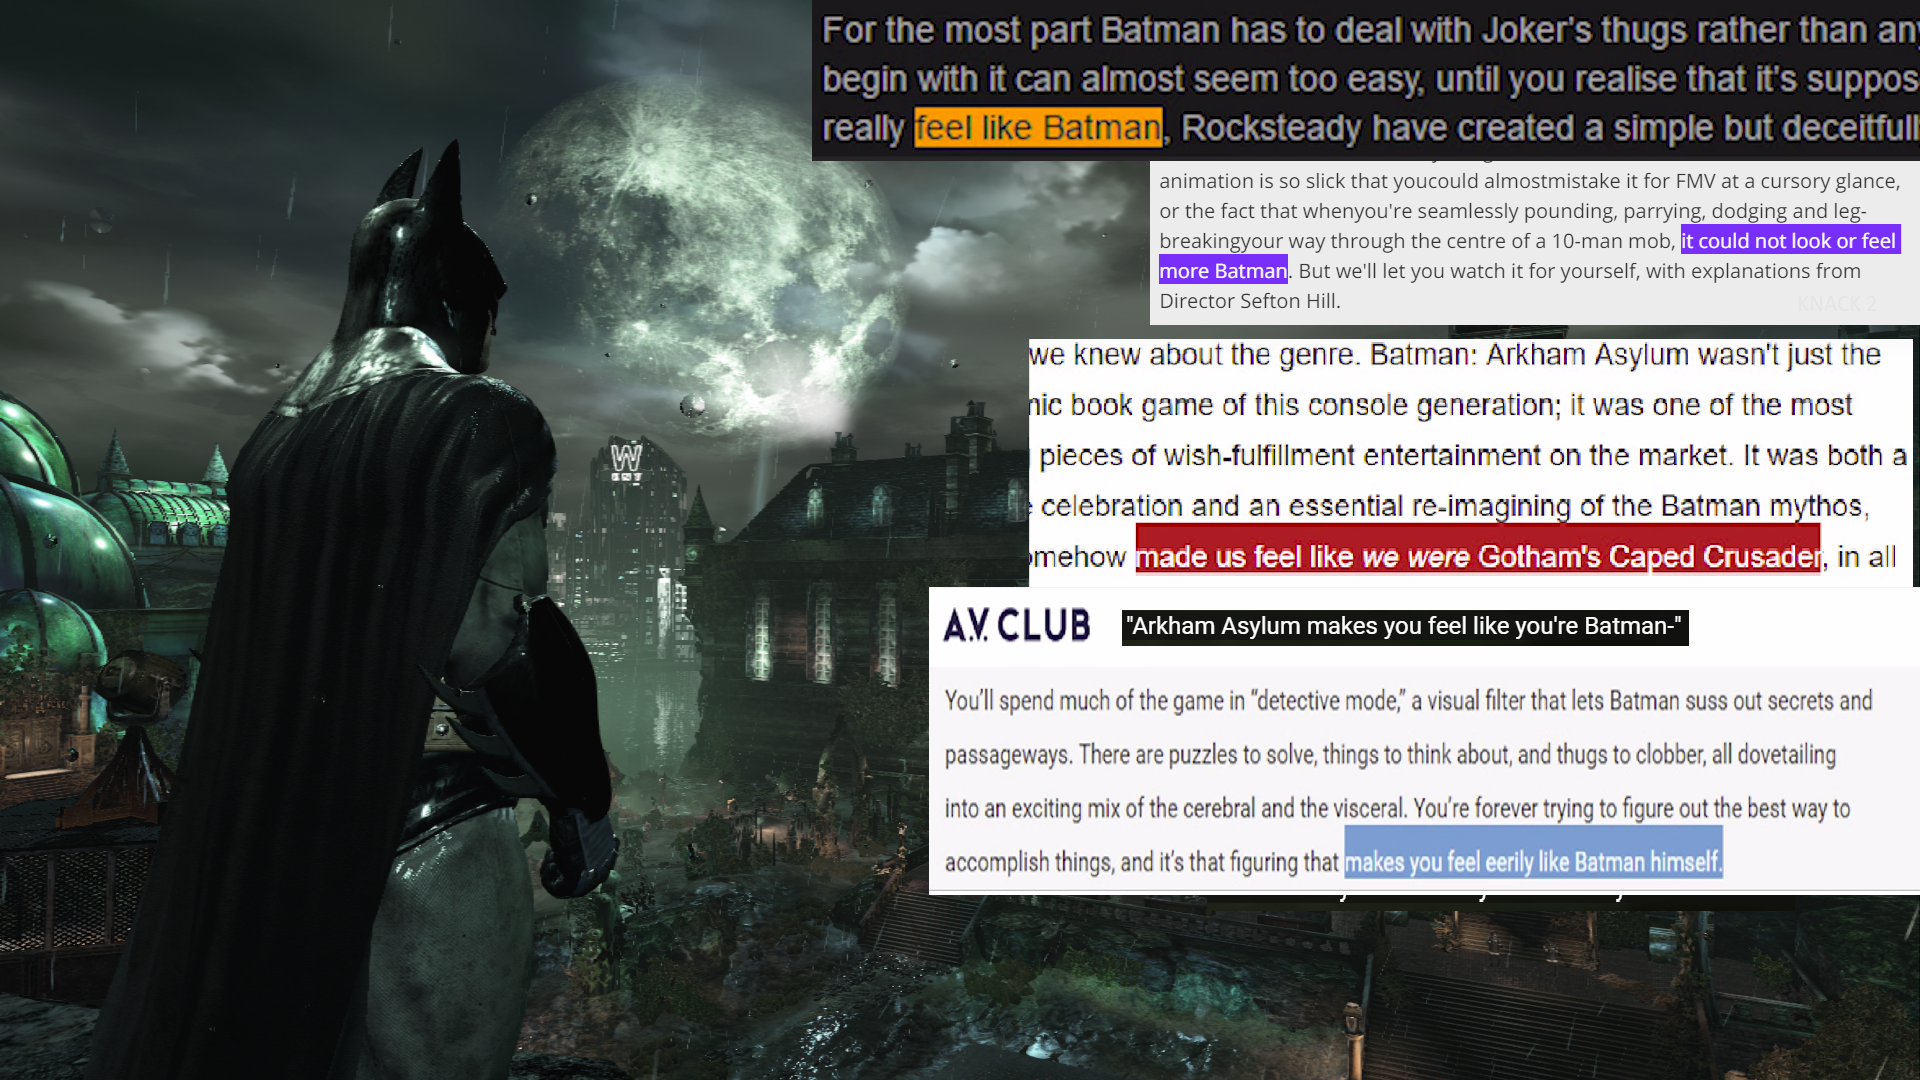

### Project Summary:

Game Reviews have slowly evolved to sound more and more monotonous over time. Unfortunately, many of these reviews say the same, and it isn’t easy to distinguish one thought from another. This project will use NLP techniques and visualizations to explore the similarity of reviews from the 2009 video game "Batman: Arkham Asylum.”

This notebook focuses on exploring the data and using NLP to understand how similar different reviews are.

Note: I revisited this project in 2023 to clean up some of the script for my portfolio: a previous iteration can still be found on my GIT.




### Research Questions to be Answered:

1. How similar are the reviews?

2. Which reviews are the most/least similar?


## 0.  Additional Cleaning for Text Processing and Visualizations

In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

reviews = pd.read_excel('arkham_asylum_review_data.xlsx')

reviews.head()

review_link  \
0  https://en.wikipedia.org/wiki/Batman:_Arkham_A...   
1  https://www.gamespot.com/reviews/batman-arkham...   
2  https://www.destructoid.com/review-batman-arkh...   
3  https://gameblur.net/editorial/batman-arkham-a...   
4  https://www.commonsensemedia.org/game-reviews/...   

                                 review_link_encoded  \
0  https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FBatman...   
1  https%3A%2F%2Fwww.gamespot.com%2Freviews%2Fbat...   
2  https%3A%2F%2Fwww.destructoid.com%2Freview-bat...   
3  https%3A%2F%2Fgameblur.net%2Feditorial%2Fbatma...   
4  https%3A%2F%2Fwww.commonsensemedia.org%2Fgame-...   

                                         review_json           site_name  \
0  {'request': {'pageUrl': 'https://en.wikipedia....       wikipedia.org   
1  {'request': {'pageUrl': 'https://www.gamespot....            GameSpot   
2  {'request': {'pageUrl': 'https://www.destructo...         Destructoid   
3  {'request': {'pageUrl': 'https://gameblur.net/...            gameblur   
4  {'request': {'pageUrl': 'https://www.commonsen...  Common Sense Media   

                          review_title      review_author     review_postdate  \
0                Batman: Arkham Asylum                NaN 2008-08-12 20:11:16   
1         Batman: Arkham Asylum Review     Justin Calvert 2009-08-25 00:00:00   
2        Review: Batman: Arkham Asylum  Destructoid Staff 2009-08-27 22:00:00   
3  Batman: Arkham Asylum Retrospective       Andrew Logue 2022-11-17 13:03:52   
4                Batman: Arkham Asylum                NaN 2009-08-23 00:00:00   

                                         review_text  review_length  
0  2009 video game For other uses, see Arkham Asy...           7329  
1  You have heard of Batman no doubt, but if you ...           2240  
2  Finding a licensed superhero game which stays ...           2405  
3  I had little enthusiasm left for Gotham Knight...           1987  
4  Add your rating This is one of the best games ...            614

In [200]:
# One Review per domain
reviews.drop_duplicates(keep='first',subset= 'site_name',inplace = True)

In [201]:
import string
from nltk.corpus import stopwords


def text_process(text):
    '''
    Function to clear up common stop words and to remove punctuation, output is a list
    '''

    nopunc = [char for char in str(text) if char not in string.punctuation]

    nopunc = "".join(nopunc)

    return [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]


reviews["cleaned_review_text"] = reviews["review_text"].apply(text_process)

reviews["cleaned_review_text"].head()

0    [2009, video, game, uses, see, Arkham, Asylum,...
1    [heard, Batman, doubt, read, comics, conceivab...
2    [Finding, licensed, superhero, game, stays, tr...
3    [little, enthusiasm, left, Gotham, Knights, re...
4    [Add, rating, one, best, games, time, everyone...
Name: cleaned_review_text, dtype: object

In [202]:
# Feeding sentences into a spaCy pipeline component
import en_core_web_sm

nlp = en_core_web_sm.load()

nlp.add_pipe("sentencizer",before="parser") 

reviews["spacy_words"] = reviews["review_text"].apply(lambda x: nlp(str(x)))

reviews["spacy_words"].head(3)

0    (2009, video, game, For, other, uses, ,, see, ...
1    (You, have, heard, of, Batman, no, doubt, ,, b...
2    (Finding, a, licensed, superhero, game, which,...
3    (I, had, little, enthusiasm, left, for, Gotham...
4    (Add, your, rating, This, is, one, of, the, be...
Name: spacy_words, dtype: object

In [203]:
# Getting proper noun usage
reviews["proper_noun_list"] = reviews["spacy_words"].apply(lambda x: x.ents)

reviews["proper_noun_list"].head(3)

In [204]:
import string
from spacy.lang.en.stop_words import STOP_WORDS


def  token_processor(tokens):
    
    '''
    Function for Lemmatization and Stemming
    '''
    
    nopunc = [token for token in tokens if str(token) not in string.punctuation]
    
    return [token for token in nopunc if str(token).lower() not in STOP_WORDS]
        
    #return [token._lemma for token in ]

reviews["spacy_words"] = reviews["spacy_words"].apply(token_processor)

reviews["spacy_words"].head(3)

In [206]:
#Parsing sentences with SpaCy
reviews["spacy_sents"] = reviews["review_text"].apply(lambda x: [sent.text.strip().lower() for sent in nlp(str(x)).sents])

reviews["spacy_sents"].head(3)

0    [2009 video game for other uses, see arkham as...
1    [you have heard of batman no doubt, but if you...
2    [finding a licensed superhero game which stays...
3    [i had little enthusiasm left for gotham knigh...
4    [add your rating this is one of the best games...
Name: spacy_sents, dtype: object

In [260]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

reviews["cleaned_and_stemmed"] = reviews["cleaned_review_text"].apply(lambda x: [porter.stem(word) for word in x] )

reviews["cleaned_and_stemmed"].head(3)

0    [2009, video, game, use, see, arkham, asylum, ...
1    [heard, batman, doubt, read, comic, conceiv, m...
2    [find, licens, superhero, game, stay, true, so...
Name: cleaned_and_stemmed, dtype: object

## 2.  EDA of Review Data

In [208]:
print(reviews.info())

reviews.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 104
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   review_link          73 non-null     object        
 1   review_link_encoded  73 non-null     object        
 2   review_json          73 non-null     object        
 3   site_name            73 non-null     object        
 4   review_title         73 non-null     object        
 5   review_author        50 non-null     object        
 6   review_postdate      64 non-null     datetime64[ns]
 7   review_text          68 non-null     object        
 8   review_length        73 non-null     int64         
 9   cleaned_review_text  73 non-null     object        
 10  spacy_words          73 non-null     object        
 11  proper_noun_list     73 non-null     object        
 12  spacy_sents          73 non-null     object        
 13  cleaned_and_stemmed  73 non-null    

review_length
count      73.000000
mean     1646.602740
std      2665.309388
min         0.000000
25%       635.000000
50%      1221.000000
75%      2024.000000
max     21926.000000

In [265]:
# Looking through the reviews, the following sites have been dismissed as the data is sparse or erroneous

invalid_links = ["Metacritic", "The Brothers Brick", "Brickset.com", "The Brick Fan", "Brick Fanatics", "FBTB", "lego.com",
                 "www.mwctoys.com", "goodreads.com", "Comics Authority", "ComicBookRoundup.com", "the m0vie blog", "cbr.com", "Geek.com",
                 "wikipedia.org", "steampowered.com", "gamerankings.com", "Ars Technica", "Gotham Archives", "TechCrunch", "Tech Spot", "Final Bosses", "The Daily Planet", "steamcommunity.com", "Washington Post", "tcj.com",
                 "Tom's Hardware", "[H]ard|OCP", "Evening Standard", "pcgamer", "amazon.com", "TechSpot", "gameinformer", "n4g.com", "Press The Buttons", "Tom's Guide"]

cleaned_reviews = reviews[~reviews["site_name"].isin(invalid_links) == True]

C:\Users\Jweiss13\AppData\Local\Temp/ipykernel_17292/3176445889.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax =cleaned_reviews[reviews["review_postdate"].isna()==False]["review_postdate"].apply(


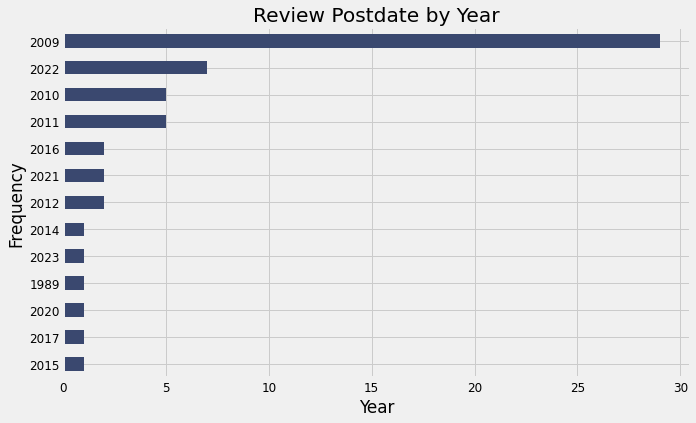

In [211]:
fig = plt.figure(figsize=(10, 6))


plt.title("Review Postdate by Year")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.tick_params(axis='both', which="major", labelsize=12)
ax = cleaned_reviews[reviews["review_postdate"].isna() == False]["review_postdate"].apply(
    lambda x: str(x.year)).value_counts().sort_values().plot(color="#3a486f", kind="barh")

In [212]:
cleaned_reviews = cleaned_reviews[cleaned_reviews["review_postdate"].apply(
    lambda x: x.year) == 2009]

len(cleaned_reviews)

29

Text(0.5, 1.0, 'Word Count by Review (Raw)')

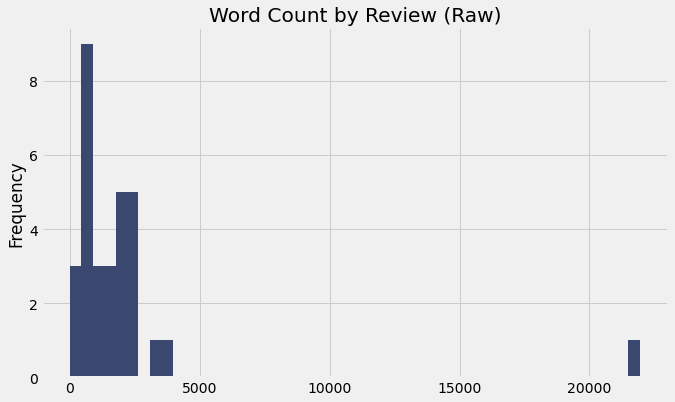

In [193]:
plt.figure(figsize=(10, 6))
reviews["review_length"].plot.hist(bins=50, color="#3a486f")
plt.title("Word Count by Review (Raw)")

Text(0.5, 1.0, 'Most Common 50 Words')

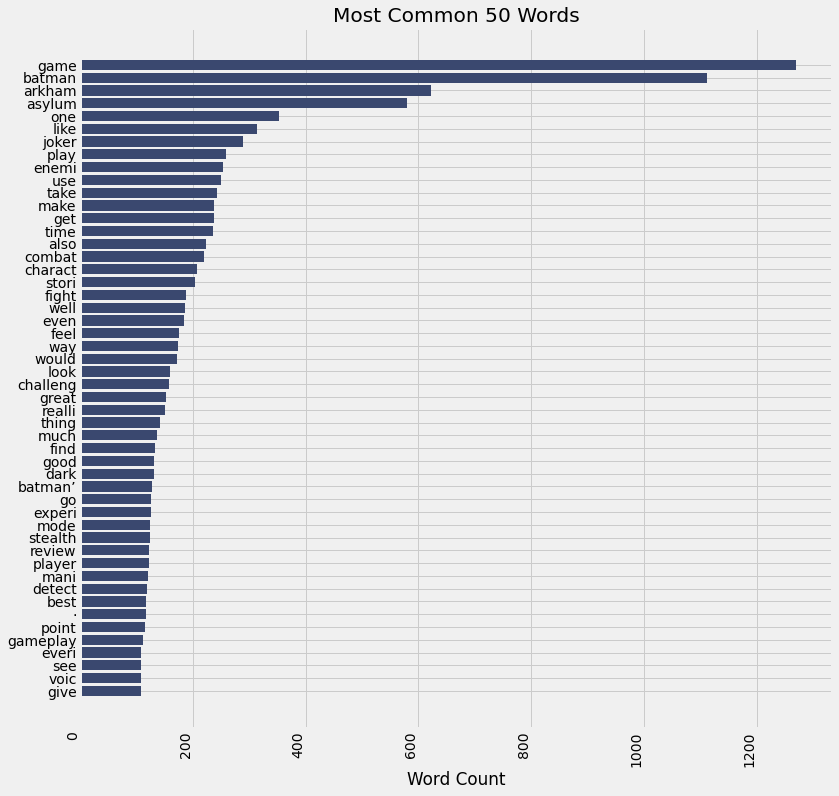

In [194]:
from collections import Counter

word_count = []

for text in cleaned_reviews["cleaned_and_stemmed"]:

    word_count.append(Counter(str(x) for x in text))

tot_word_count = sum((word_count), Counter())

words = [x[0] for x in tot_word_count.most_common(50)]
values = [int(x[1]) for x in tot_word_count.most_common(50)]

plt.figure(figsize=(12, 12))
plt.barh(words[::-1], values[::-1], color="#3a486f", )
plt.xlabel("Word Count")
plt.xticks(rotation=90, ha='right')
plt.title('Most Common 50 Words')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Batman: Arkham Asylum Review'),
  Text(1, 0, 'Batman: Arkham Asylum'),
  Text(2, 0, 'Review: Batman: Arkham Asylum'),
  Text(3, 0, 'Batman: Arkham Asylum review'),
  Text(4, 0, 'Batman: Arkham Asylum, Game Review'),
  Text(5, 0, 'Batman Arkham Asylum (PS3) Review: The Dawn Is Coming'),
  Text(6, 0, 'Review: Creepy Batman: Arkham Asylum Redefines Comic-Book Game'),
  Text(7, 0, "'Batman: Arkham Asylum' Review"),
  Text(8, 0, 'Batman: Arkham Asylum Review: The Dark Knight Is A Bright Light'),
  Text(9, 0, 'Batman: Arkham Asylum for the PS3 | Review')])

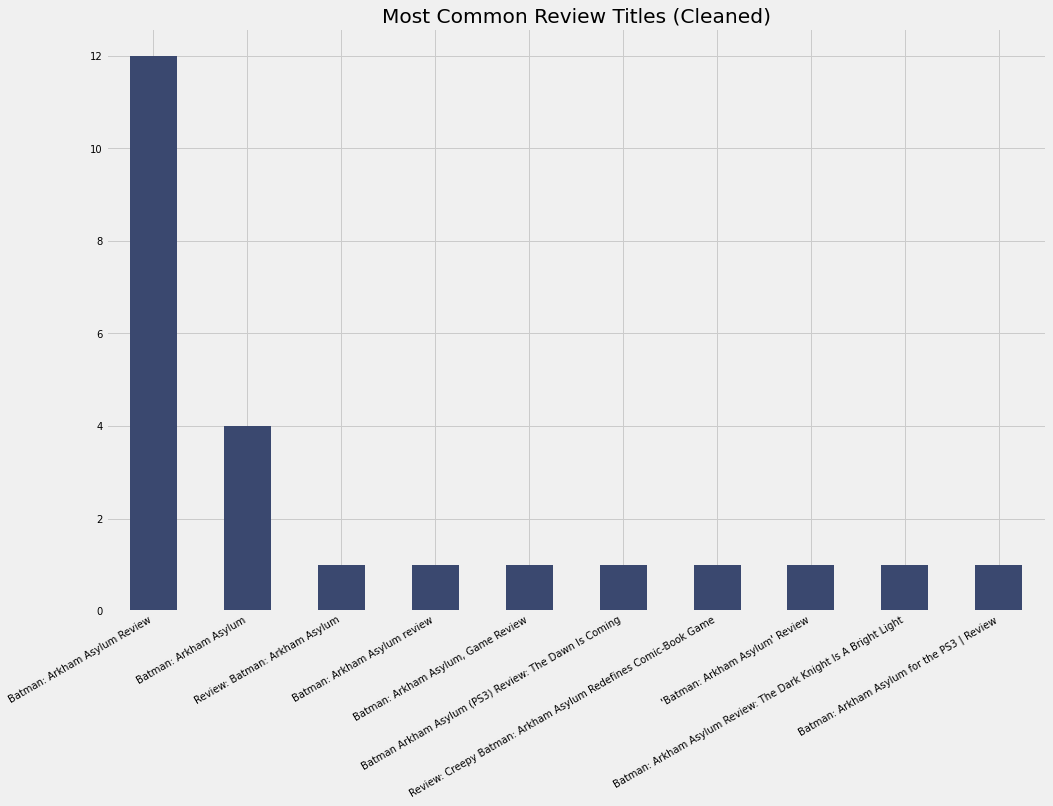

In [213]:
cleaned_reviews["review_title"].value_counts().head(10).plot(kind='bar', title="Most Common Review Titles (Cleaned)",
                                                             figsize=(15, 10), fontsize=10, color="#3a486f")

plt.xticks(rotation=30, ha='right')

<AxesSubplot:title={'center':'Review Postdate 2009 by Month (Cleaned)'}, xlabel='Month (in number form)', ylabel='Frequency'>

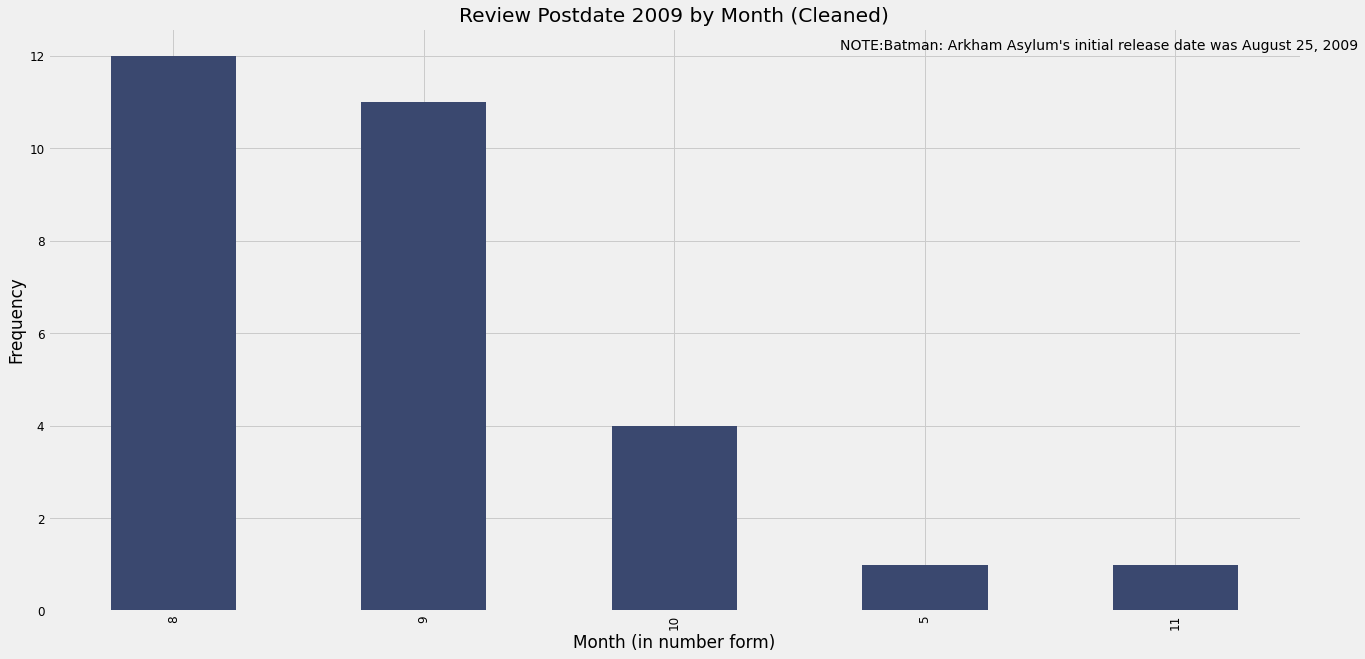

In [214]:
fig = plt.figure(figsize=(20, 10))
plt.title("Review Postdate 2009 by Month (Cleaned)")
plt.xlabel("Month (in number form)")
plt.ylabel("Frequency")
plt.tick_params(axis="both", which="major", labelsize=12)
fig.text(.63, .85, "NOTE:Batman: Arkham Asylum's initial release date was August 25, 2009")
cleaned_reviews[cleaned_reviews["review_postdate"].apply(lambda x: x.year) == 2009]["review_postdate"].apply(
    lambda x: x.month).value_counts().plot(color="#3a486f", kind="bar")

<AxesSubplot:title={'center':'Review Postdate in Aug 2009 by Day'}>

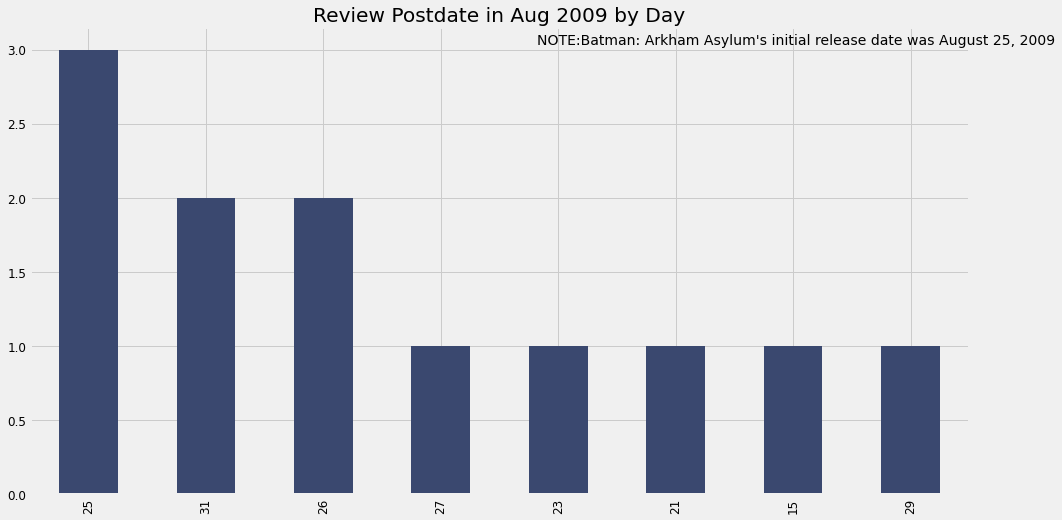

In [215]:
fig = plt.figure(figsize=(15, 8))
plt.tick_params(axis="both", which="major", labelsize=12)
plt.title("Review Postdate in Aug 2009 by Day")
fig.text(.55, .85, "NOTE:Batman: Arkham Asylum's initial release date was August 25, 2009")
cleaned_reviews[(cleaned_reviews["review_postdate"].apply(lambda x: x.year) == 2009) & (cleaned_reviews["review_postdate"].apply(
    lambda x: x.month) == 8)]["review_postdate"].apply(lambda x: x.day).value_counts().plot(color="#3a486f", kind="bar")

## 3.  Cosine Similarity: How Similar are the reviews?

In [239]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

# making custom cmp
norm = plt.Normalize(-2, 2)
batman_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ['#3a486f', '#3c4018', '#ffed39'])

In [240]:
# I used the following link to write the code for reference in the following section.
# https://www.machinelearningplus.com/nlp/cosine-similarity/

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

countsparse_matrix = count_vectorizer.fit_transform(
    cleaned_reviews["cleaned_and_stemmed"].apply(lambda x: ",".join(x)))

In [241]:
doc_term_matrix = countsparse_matrix.todense()

countdf = pd.DataFrame(doc_term_matrix,
                       columns=count_vectorizer.get_feature_names(),
                       index=cleaned_reviews["site_name"])

<AxesSubplot:title={'center':'Cosine Similarity of Reviews (Count Vectorizer)'}>

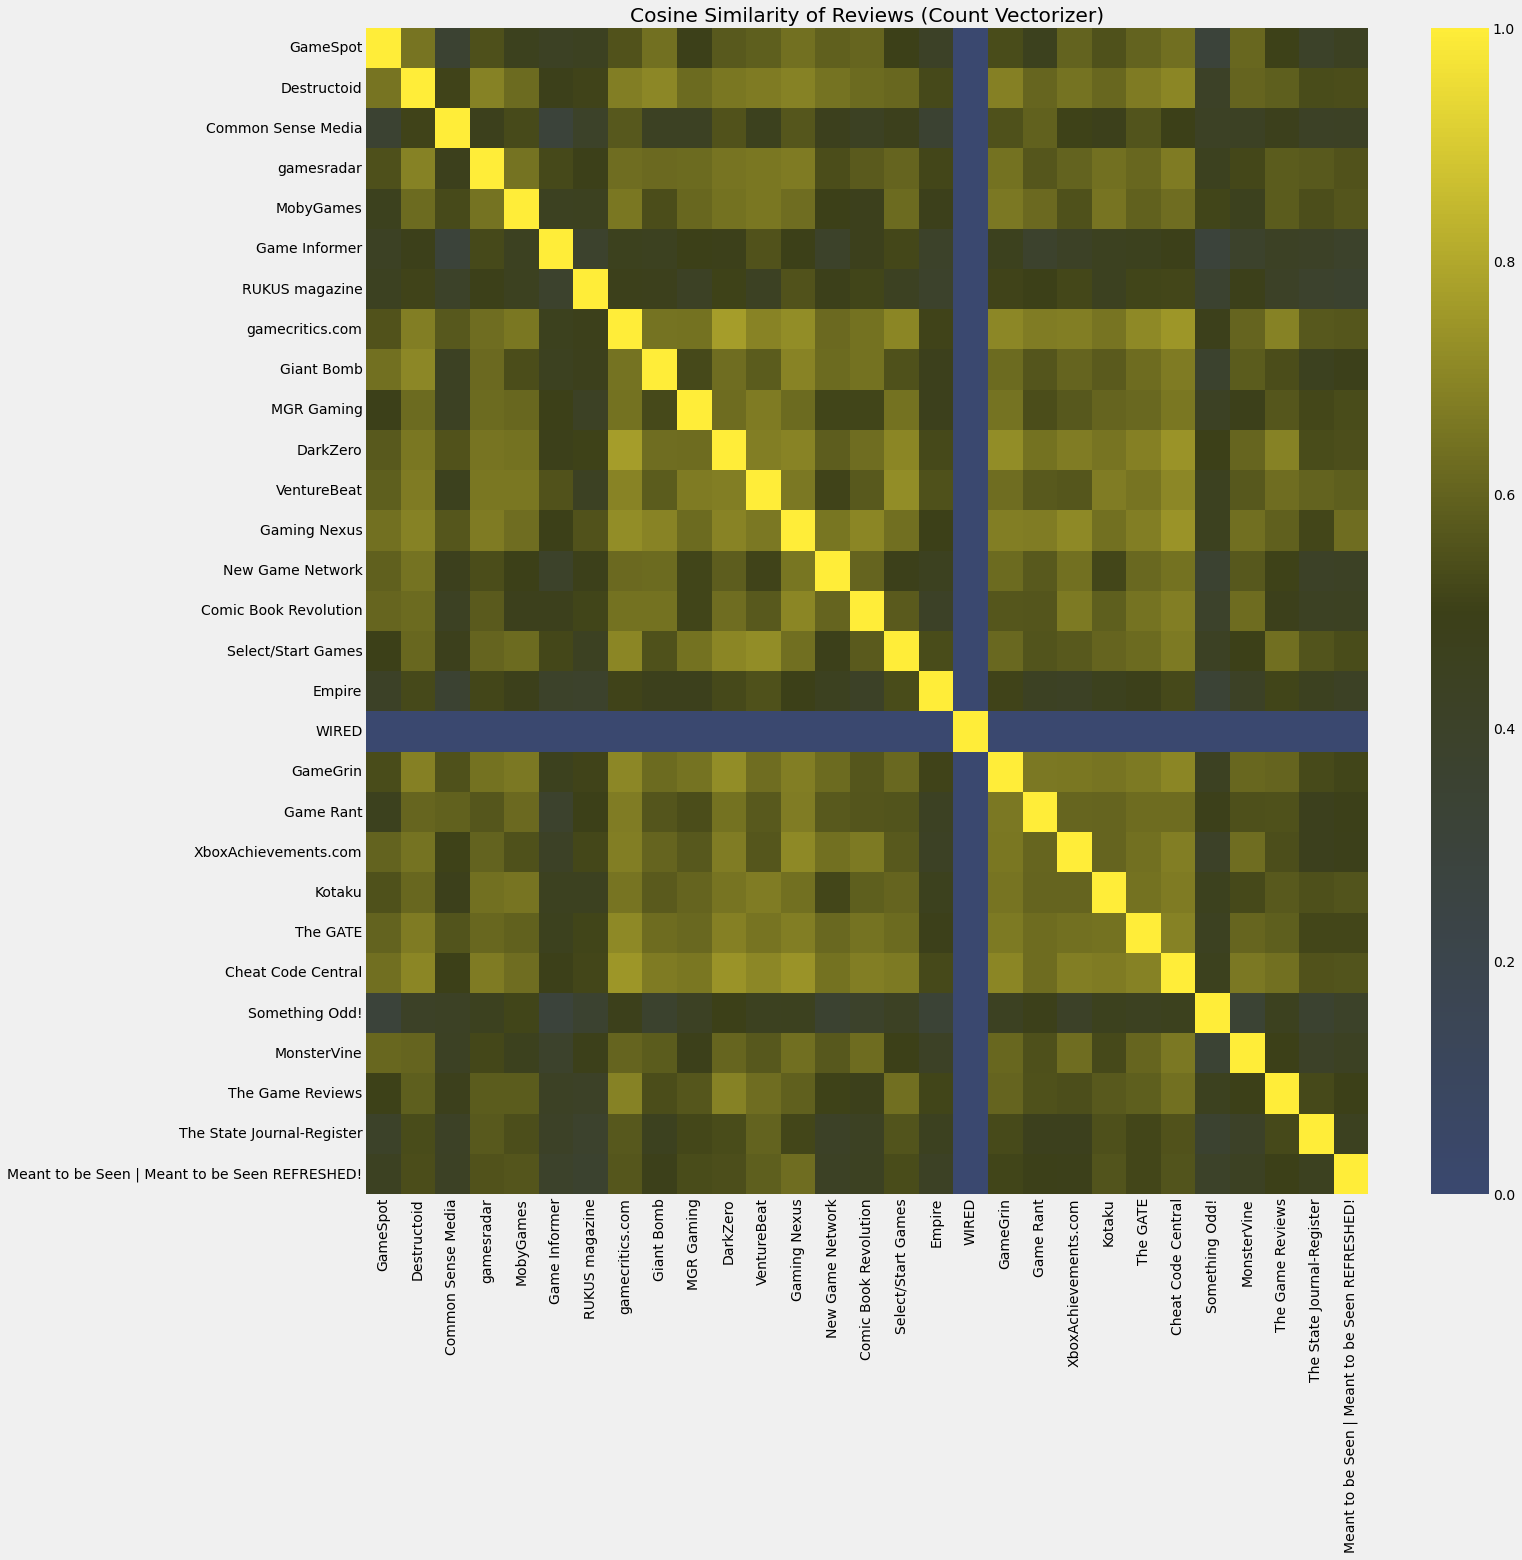

In [242]:
plt.figure(figsize=(20, 20))
plt.title("Cosine Similarity of Reviews (Count Vectorizer)")

sns.heatmap(cosine_similarity(countdf, countdf), cmap=batman_cmap,
            xticklabels=cleaned_reviews["site_name"], yticklabels=cleaned_reviews["site_name"])

<AxesSubplot:title={'center':'Cosine Similarity of Reviews (Tfidf Vectorizer)'}>

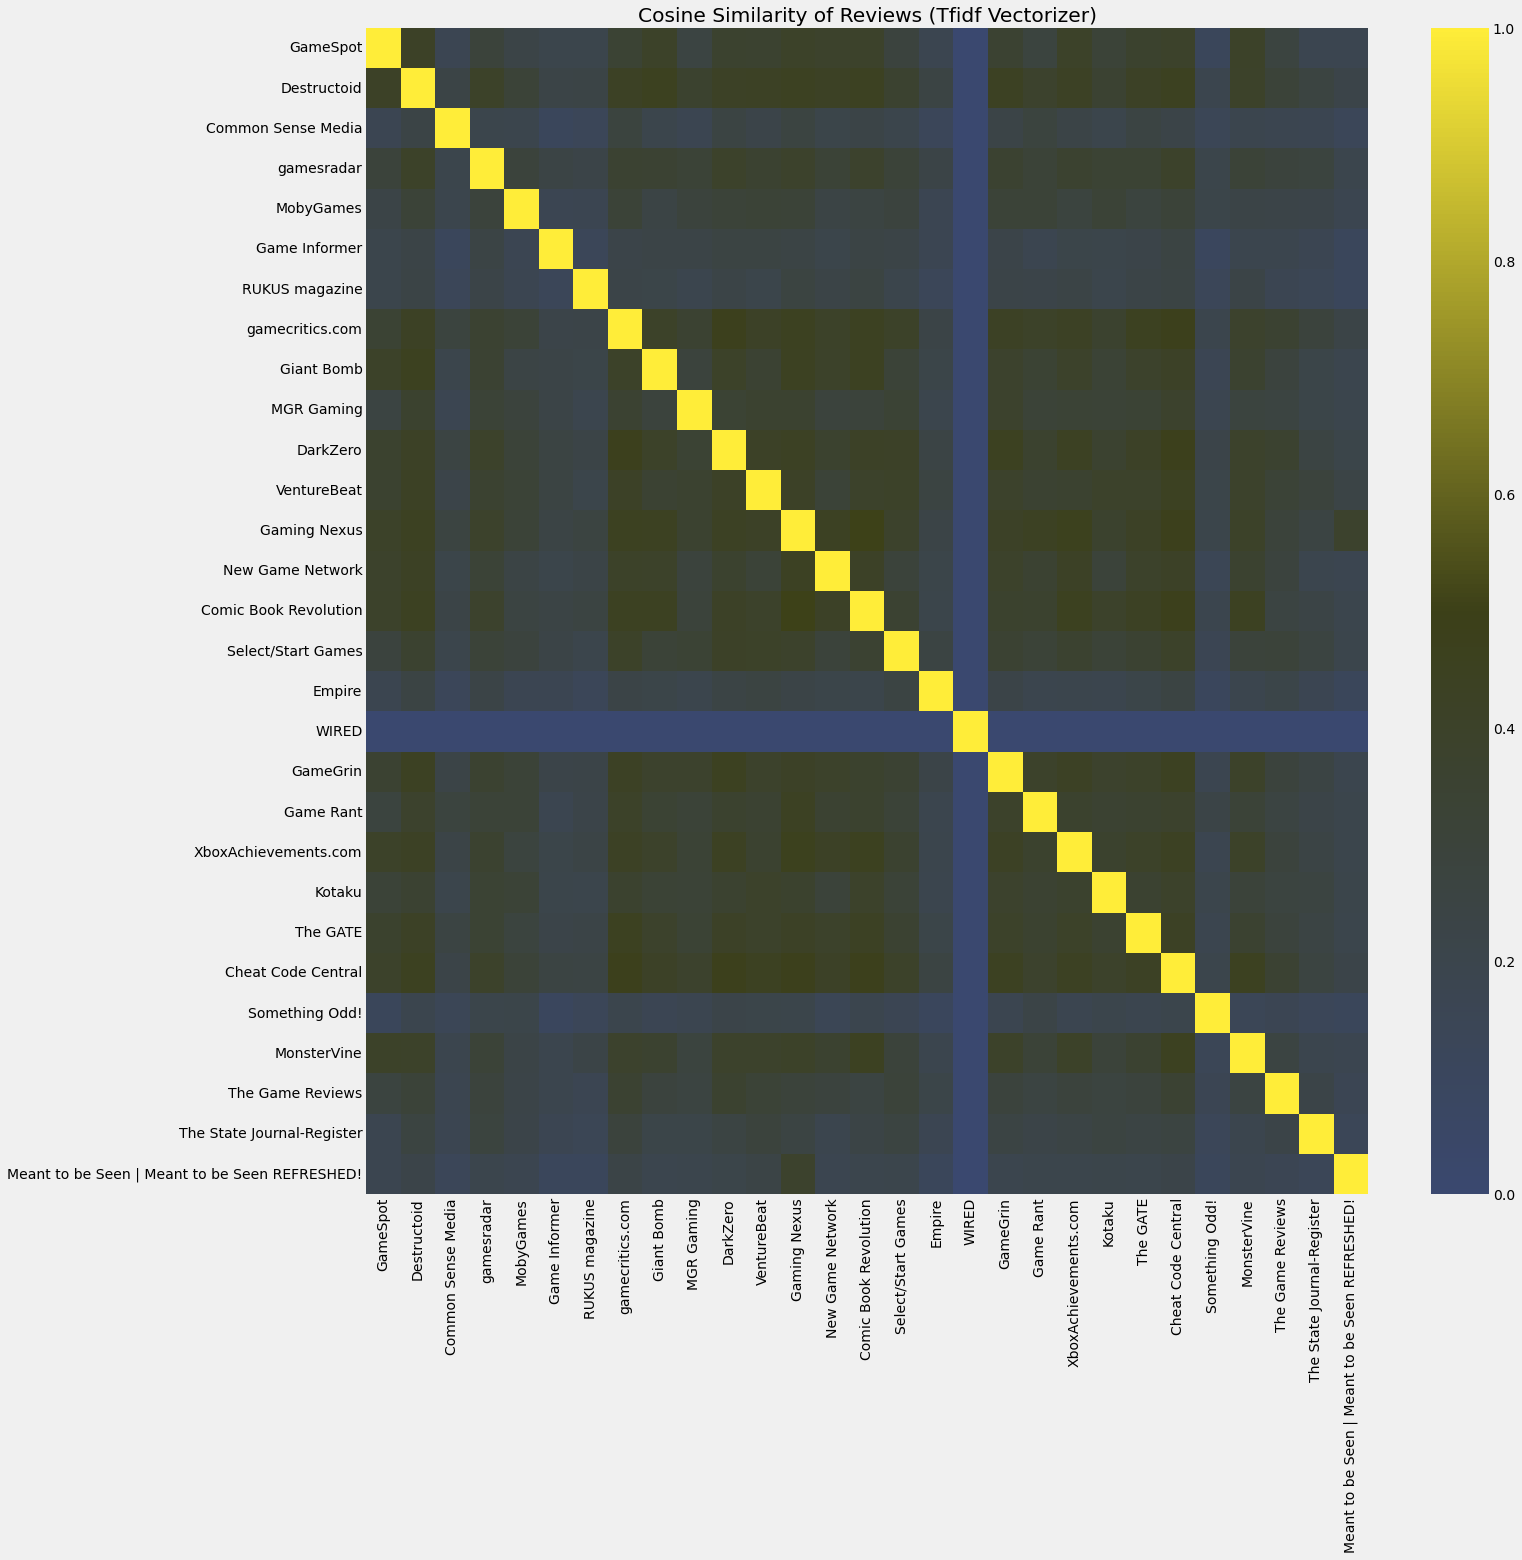

In [243]:
# Now let's see the visual difference between TfidfVectorizer and CountVectorizer
# I am curious to see how much of an impact normalization has, AKA it puts weight on words that occur frequently.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfsparse_matrix = tfidf_vectorizer.fit_transform(
    cleaned_reviews["cleaned_and_stemmed"].apply(lambda x: ",".join(x)))

tfdoc_term_matrix = tfsparse_matrix.todense()

tfid_df = pd.DataFrame(tfdoc_term_matrix,
                       columns=count_vectorizer.get_feature_names(),
                       index=cleaned_reviews["site_name"])

plt.figure(figsize=(20, 20))
plt.title("Cosine Similarity of Reviews (Tfidf Vectorizer)")

sns.heatmap(cosine_similarity(tfid_df, tfid_df), cmap=batman_cmap,
            xticklabels=cleaned_reviews["site_name"], yticklabels=cleaned_reviews["site_name"])

<AxesSubplot:title={'center':'Cosine Similarity Using Tfid Vectorizer (Normalized)'}>

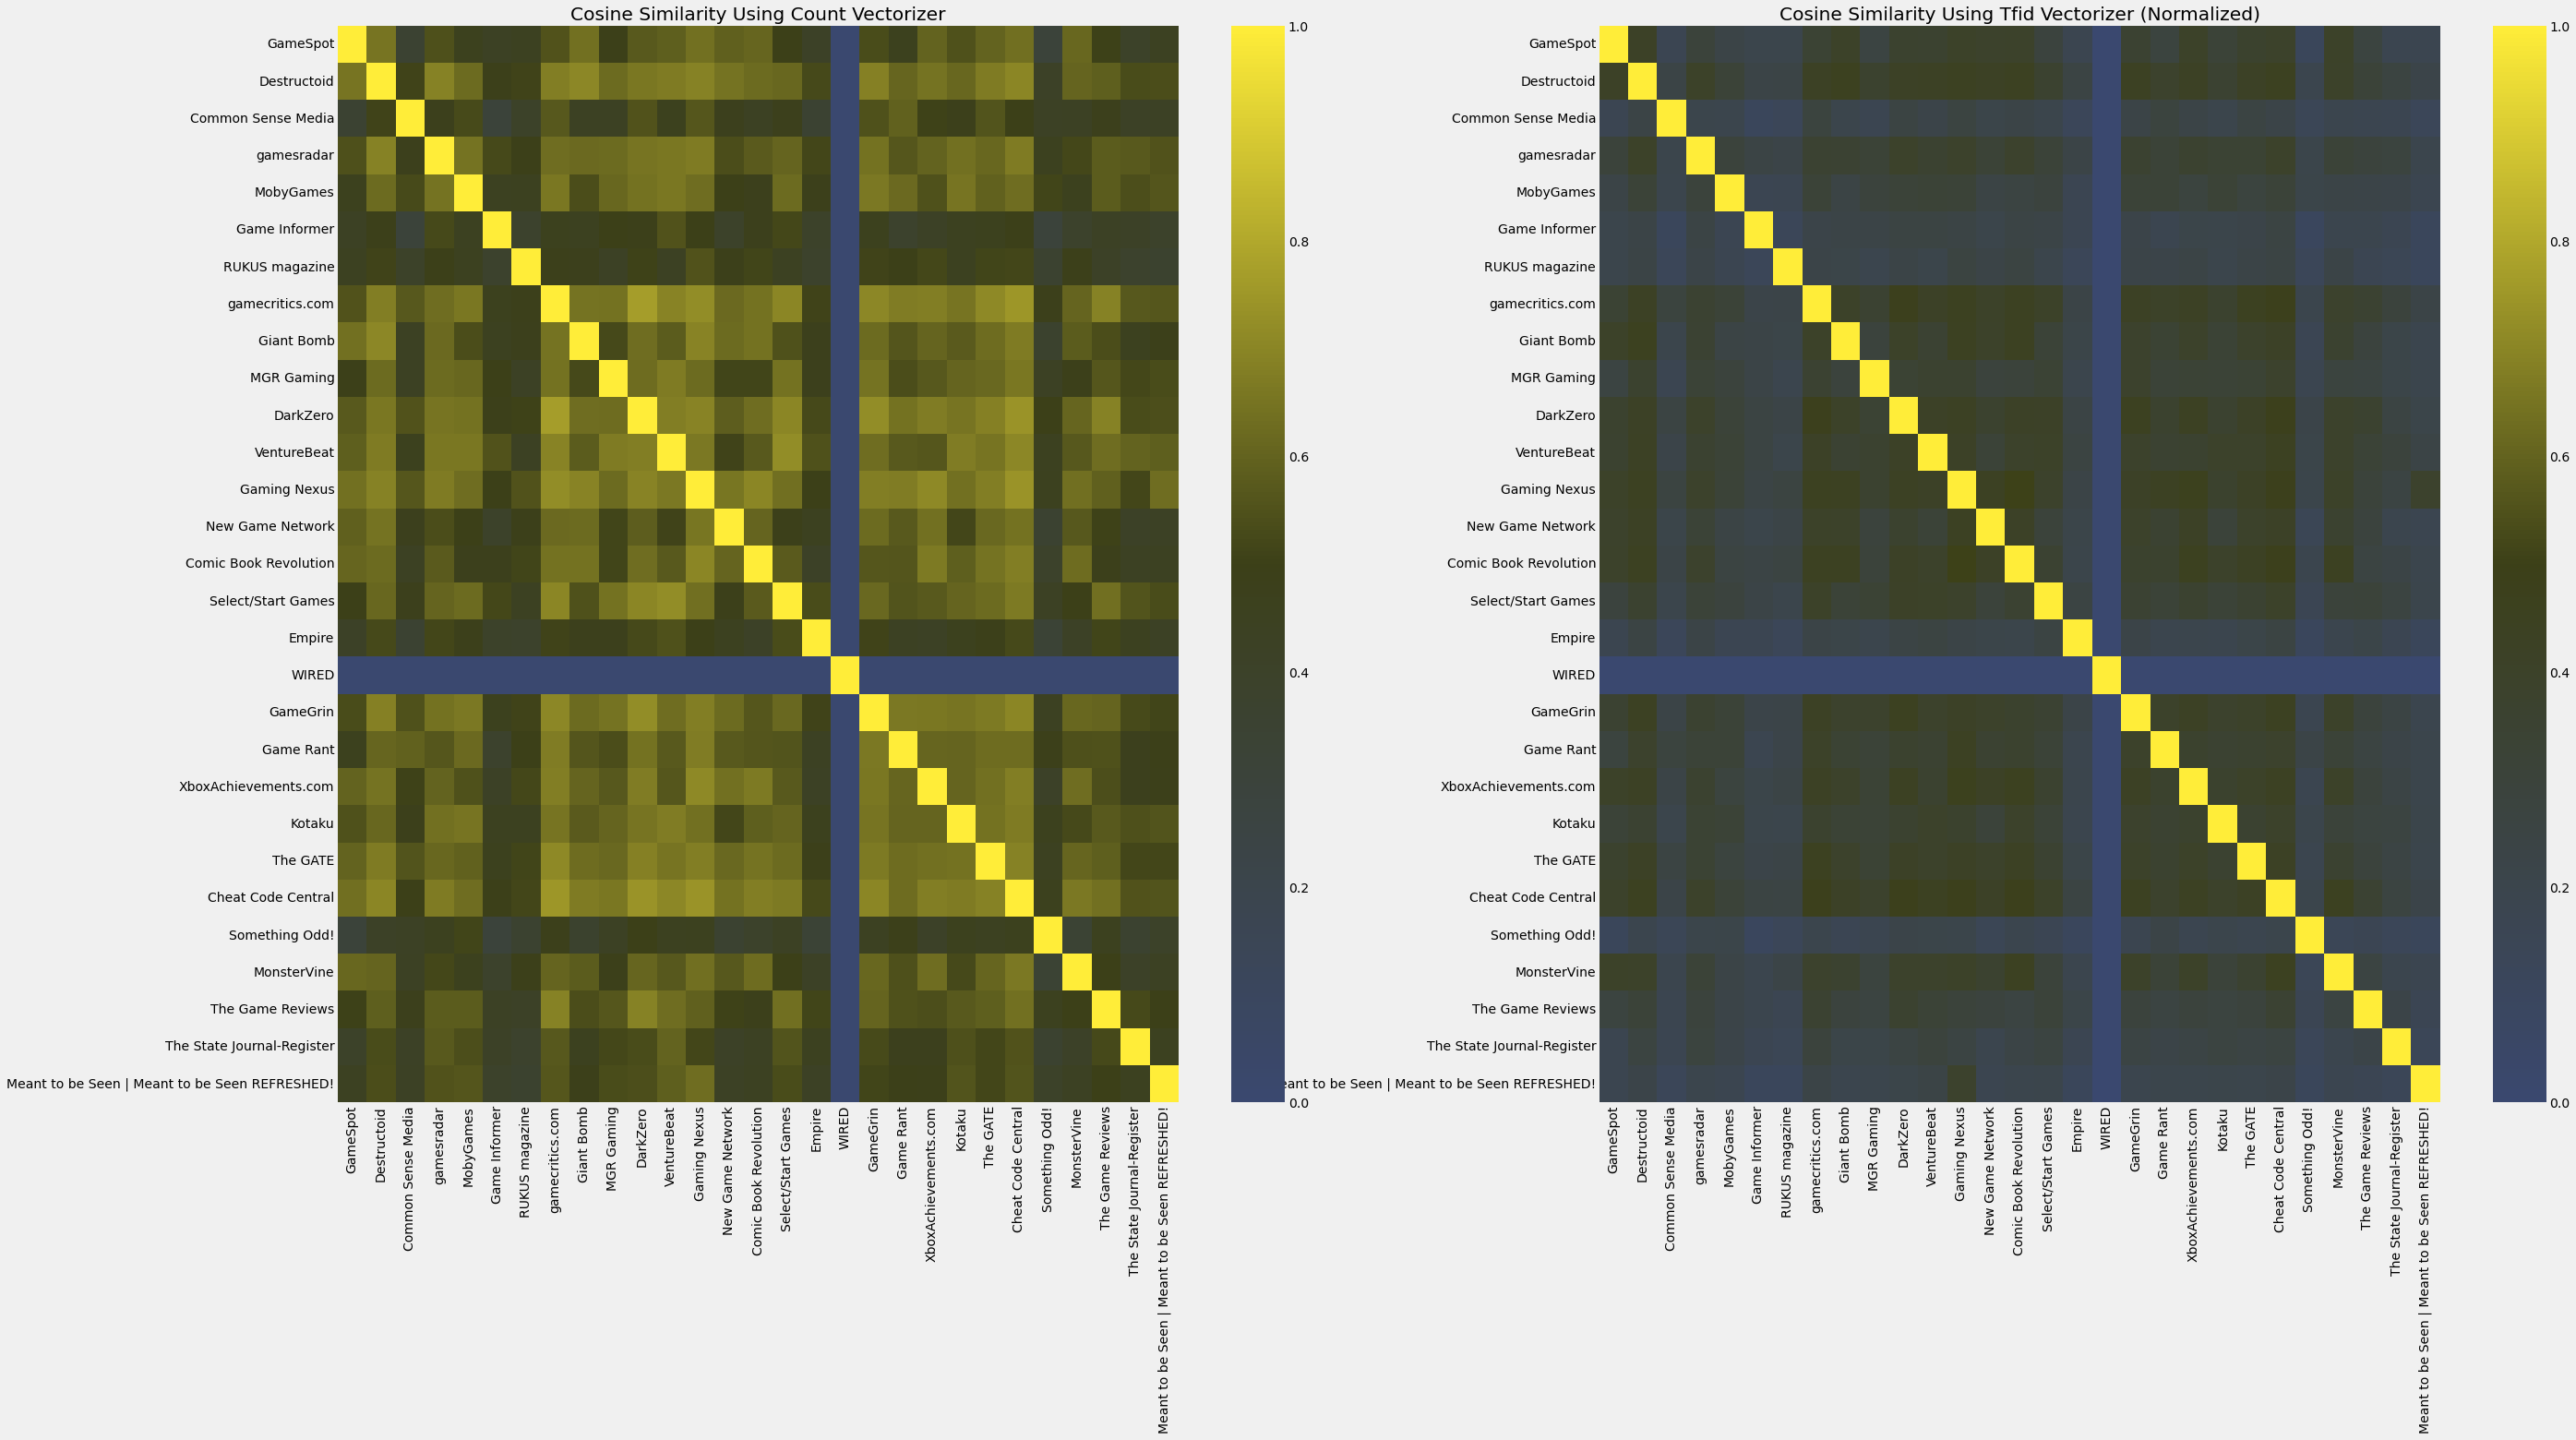

In [244]:
# Side by side of Non- Normalized vs Normalized Cosine Similarity
fig, axes = plt.subplots(1, 2, figsize=(40, 20))

axes[0].set_title("Cosine Similarity Using Count Vectorizer")
axes[1].set_title("Cosine Similarity Using Tfid Vectorizer (Normalized)")

sns.heatmap(cosine_similarity(countdf, countdf), cmap=batman_cmap,
            xticklabels=cleaned_reviews["site_name"], yticklabels=cleaned_reviews["site_name"], ax=axes[0])

sns.heatmap(cosine_similarity(tfid_df, tfid_df), cmap=batman_cmap,
            xticklabels=cleaned_reviews["site_name"], yticklabels=cleaned_reviews["site_name"], ax=axes[1])

In [245]:
#Getting the most Correlated Pairs using Count Vectorizer

import heapq

count_sim_list =cosine_similarity(countdf,countdf).tolist()

all_count_list= []

for array in count_sim_list:
    
    all_count_list += array
    
all_count_list = set([f for f in all_count_list if f <.95])

top_count_corrlist = heapq.nlargest(10,(all_count_list))

In [246]:
#Getting the most Correlated Pairs usinf Tfid Vectorizer

tfid_sim_list =cosine_similarity(tfid_df, tfid_df).tolist()

all_tfid_list= []

for array in tfid_sim_list:
    
    all_tfid_list += array
    
all_tfid_list = set([f for f in all_tfid_list if f <.95])

top_tfid_corrlist = heapq.nlargest(10,(all_tfid_list))

In [247]:
#Creating a dataframe to easily extract pair information

count_corrdf = pd.DataFrame(data= cosine_similarity(countdf,countdf),    
                 index=cleaned_reviews["site_name"].values, 
                columns= cleaned_reviews["site_name"].values) 

In [249]:
print("The most correlated reviews using Count Vectorizer are as follows:","\n")

for corr in top_count_corrlist:
    
    mostcorr = count_corrdf[count_corrdf.values== corr].index.values
    
    mostcorr = mostcorr.tolist()
    
    print("{} and {}, with a correlation of {}".format(mostcorr[0], mostcorr[1], round(corr,4)))
   
    print("")

The most correlated reviews using Count Vectorizer are as follows: 

gamecritics.com and DarkZero, with a correlation of 0.7691

gamecritics.com and Cheat Code Central, with a correlation of 0.7485

DarkZero and Cheat Code Central, with a correlation of 0.7397

Gaming Nexus and Cheat Code Central, with a correlation of 0.7385

DarkZero and GameGrin, with a correlation of 0.722

gamecritics.com and Gaming Nexus, with a correlation of 0.7211

VentureBeat and Select/Start Games, with a correlation of 0.7191

gamecritics.com and The GATE, with a correlation of 0.7077

Gaming Nexus and XboxAchievements.com, with a correlation of 0.7073

Destructoid and Giant Bomb, with a correlation of 0.7051



In [250]:
tfid_corrdf = pd.DataFrame(data= cosine_similarity(tfid_df, tfid_df),    
                 index=cleaned_reviews["site_name"].values, 
                columns= cleaned_reviews["site_name"].values) 

print("The most correlated reviews using Tfid Vectorizer are as follows:","\n")

for corr in top_tfid_corrlist:
    
    mostcorr = tfid_corrdf[tfid_corrdf.values== corr].index.values
    
    mostcorr = mostcorr.tolist()
    
    print("{} and {}, with a correlation of {}".format(mostcorr[0], mostcorr[1], round(corr,4),))
    print("")

The most correlated reviews using Tfid Vectorizer are as follows: 

Gaming Nexus and Comic Book Revolution, with a correlation of 0.5014

gamecritics.com and Cheat Code Central, with a correlation of 0.4802

Gaming Nexus and Cheat Code Central, with a correlation of 0.4794

DarkZero and Cheat Code Central, with a correlation of 0.479

Comic Book Revolution and Cheat Code Central, with a correlation of 0.4787

gamecritics.com and DarkZero, with a correlation of 0.4724

Gaming Nexus and XboxAchievements.com, with a correlation of 0.4636

Comic Book Revolution and XboxAchievements.com, with a correlation of 0.4569

Destructoid and Giant Bomb, with a correlation of 0.4533

gamecritics.com and Gaming Nexus, with a correlation of 0.4526



In [252]:
least_count_corrlist = heapq.nsmallest(10,(all_count_list))

print("The least correlated reviews using Count Vectorizer are as follows:","\n")

for corr in least_count_corrlist:
    
    leastcorr = count_corrdf[count_corrdf.values== corr].index.values
    
    leastcorr = leastcorr.tolist()
    
    print("{} and {}, with a correlation of {}".format(leastcorr[0], leastcorr[1], round(corr,4)))
    print("")

The least correlated reviews using Count Vectorizer are as follows: 

GameSpot and Destructoid, with a correlation of 0.0

Game Informer and Something Odd!, with a correlation of 0.2988

Common Sense Media and Game Informer, with a correlation of 0.3027

GameSpot and Something Odd!, with a correlation of 0.307

Empire and Something Odd!, with a correlation of 0.3268

Something Odd! and MonsterVine, with a correlation of 0.3394

Common Sense Media and Empire, with a correlation of 0.3532

GameSpot and Common Sense Media, with a correlation of 0.3552

New Game Network and Something Odd!, with a correlation of 0.3563

RUKUS magazine and Something Odd!, with a correlation of 0.3622

